In [2]:
# IMPORTAMOS LIBRERIAS
import numpy as np
np.set_printoptions(suppress = True)

In [3]:
# la pseudo inversa cumple que para una matriz A (que puede ser no cuadrada): A.dot(A_pse) \approx Id
# es decir, al multiplicarla por la original da mas o menos la identidad
# Si existe es única
# No es conmutativa, es decir A.dot(A_pse) != A_pse.dot(A)
A = np.array([[2, 3], [5, 7], [11, 13]])
print(A) 

[[ 2  3]
 [ 5  7]
 [11 13]]


In [4]:
# Hacemos la descomposición svd
U, D, V = np.linalg.svd(A)

In [12]:
# ahora obtenemos la pseudo inversa
D_pse = np.zeros((A.shape[1], A.shape[0])) # creamos una matriz llena de ceros 
inv_D = np.linalg.inv(np.diag(D))  # calculamos la inversa de la matriz D
D_pse[:2, :2] = inv_D # reemplazamos los valores de inv_D en las correspondientes casillas de D_pse
D_pse

array([[0.05153785, 0.        , 0.        ],
       [0.        , 1.39306957, 0.        ]])

In [20]:
# Finalmente calculamos la inversa de A
A_pse = V.T.dot(D_pse).dot(U.T)
print("la inversa es \n", A_pse)
print("Notamos que da la identidad (en realidad, algo muy cercano, pero no igual) \n", A_pse.dot(A))
print("recordar que no es conmutativa esta inversa \n", A.dot(A_pse))

la inversa es 
 [[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]
Notamos que da la identidad (en realidad, algo muy cercano, pero no igual) 
 [[ 1.  0.]
 [-0.  1.]]
recordar que no es conmutativa esta inversa 
 [[ 0.25773196  0.43298969 -0.06185567]
 [ 0.43298969  0.74742268  0.03608247]
 [-0.06185567  0.03608247  0.99484536]]


In [18]:
# podemos calcular la pseudo inversa directamente con linalg.pinv
np.linalg.pinv(A)

array([[-0.50515464, -0.78865979,  0.54123711],
       [ 0.42268041,  0.67010309, -0.3814433 ]])

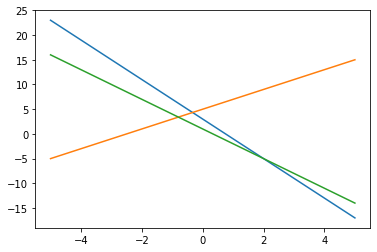

In [29]:
# podemos usar la pseudo inversa para acercarnos lo más posible a la solución de un problema que no tenga una solución exacta
# tenemos 3 rectas que no se intersectan (las 3) en un mismo punto, solo hay intersecciones de a pares
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)

y_1 = -4*x + 3
y_2 = 2*x + 5
y_3 = -3*x + 1

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)
plt.show()

In [36]:
# esto lo podemos ver como un problema típico de matrices
#A*x = b
A = np.array([[4, 1], [-2, 1], [3, 1]])
b = np.array([3, 5, 1])
A_pse = np.linalg.pinv(A)
solucion = A_pse.dot(b)

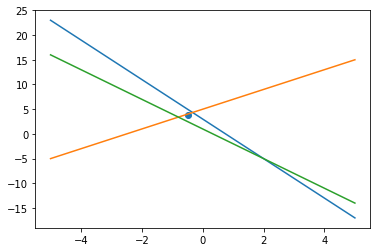

In [37]:
# mostramos el punto solucion en pantalla
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)
plt.scatter(solucion[0], solucion[1])
plt.show()

In [40]:
# ejercicio prueba
A = np.array([[-1, 1], [-2, 1], [3, 1]])
b = np.array([4, 5, 6])
A_pse = np.linalg.pinv(A)
solucion = A_pse.dot(b)

print(solucion)

[0.28571429 5.        ]


In [41]:
# otro ejercicio
M = np.array([[1, 2], [3, 4], [5, 6]])
M_pse = np.linalg.pinv(M)
M_pse

array([[-1.33333333, -0.33333333,  0.66666667],
       [ 1.08333333,  0.33333333, -0.41666667]])